In [48]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from time import time
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as cp

from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, datasets, preprocessing

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [5]:
# load mat file
mat = pd.read_csv("Chinese database.csv")


In [6]:
 mat.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 71,Attribute 72,Attribute 73,Attribute 74,Attribute 75,Attribute 76,Attribute 77,Attribute 78,Attribute 79,Y
0,0.328470,0.621909,0.681941,0.077886,0.0,0.466059,1.0,1.000000,0.031412,0.894724,...,0.2,0.0,0.0,0.626321,0.239027,0.356067,0.97561,0.182182,0.650655,1
1,0.000000,0.000000,0.681941,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.2,0.0,0.0,0.694637,0.239027,0.356067,0.97561,0.182182,0.650655,0
2,0.325102,0.517464,0.000000,0.059524,0.0,0.467174,1.0,0.641464,0.070322,0.587853,...,1.0,0.5,1.0,0.721803,0.239027,0.356067,0.97561,0.182182,0.650655,0
3,0.346195,0.478459,0.095400,0.038364,0.0,0.459010,1.0,0.476235,0.000138,0.515098,...,0.2,0.0,0.0,0.866284,0.239027,0.356067,0.97561,0.182182,0.650655,1
4,0.656937,0.627607,0.000000,0.077364,0.0,0.496723,1.0,0.805214,0.067969,0.546627,...,1.0,0.5,1.0,0.694637,0.239027,0.356067,0.97561,0.182182,0.650655,0


## load data

In [7]:
#X_train = mat['train']
#X_test = mat['test']
#y_train = mat['train_label']
#y_test = mat['test_label']

#X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Data concatenation : train + test = Data

In [9]:
Data=mat
Data.shape

(3111, 80)

## Divide data into three segement

In [29]:
D1 = Data.iloc[:, :20]
D2 = Data.iloc[:, 20:50]
D3 = Data.iloc[:, 50:79]
label=Data.iloc[:,79:]

D1.shape, D2.shape, D3.shape,label.shape

((3111, 20), (3111, 30), (3111, 29), (3111, 1))

## PCA: Data

In [30]:
n_components = 79

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(Data)
print("done in %0.3fs" % (time() - t0))



t0 = time()
Data_pca = pca.transform(Data)
print("Shape of Data PCA is: {}".format(Data_pca.shape))
print("done in %0.3fs" % (time() - t0))

done in 0.071s
Shape of Data PCA is: (3111, 79)
done in 0.007s


## PCA: D1

In [31]:
n_components = 20

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(D1)
print("done in %0.3fs" % (time() - t0))



t0 = time()
D1_pca = pca.transform(D1)
print("Shape of D1 PCA is: {}".format(D1_pca.shape))
print("done in %0.3fs" % (time() - t0))

done in 0.014s
Shape of D1 PCA is: (3111, 20)
done in 0.004s


## PCA: D2

In [32]:
n_components = 30

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(D2)
print("done in %0.3fs" % (time() - t0))



t0 = time()
D2_pca = pca.transform(D2)
print("Shape of D2 PCA is: {}".format(D2_pca.shape))
print("done in %0.3fs" % (time() - t0))

done in 0.030s
Shape of D2 PCA is: (3111, 30)
done in 0.013s


## PCA D3

In [33]:
n_components = 29

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(D3)
print("done in %0.3fs" % (time() - t0))



t0 = time()
D3_pca = pca.transform(D3)
print("Shape of D3 PCA is: {}".format(D3_pca.shape))
print("done in %0.3fs" % (time() - t0))

done in 0.027s
Shape of D3 PCA is: (3111, 29)
done in 0.004s


# concatenate all pca: D1+D2+D3 = segement_pca

In [34]:
segement_pca = np.concatenate((D1_pca, D2_pca, D3_pca), axis = 1)

print("Shape of segement_pca PCA is: {}".format(segement_pca.shape))

Shape of segement_pca PCA is: (3111, 79)


## Extract Top 79 PCA accprding to code

In [35]:
segement_pca = segement_pca[:, :79]

print("After complete segemented the shape of the Data is: {}".format(segement_pca.shape))

After complete segemented the shape of the Data is: (3111, 79)


# SVM On segement_pca

## train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(segement_pca, label, test_size = 0.2, random_state=121)

X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((2488, 79), (623, 79), (2488, 1), (623, 1))

## Train svm on GridSearch approach

In [37]:
#############################################################################
#Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 1e4],
              'gamma': [0.0001,  0.001], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 2.814s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


## Test the model

In [40]:

# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting HSI on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))


#label_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill', 
              #'Soybean-clean', 'Wheat', 'Wood', ]
label_names=['One','Two']
print(classification_report(y_test, y_pred, target_names=label_names))
print(confusion_matrix(y_test, y_pred, labels=range(14)))

Predicting HSI on the test set
done in 0.011s
              precision    recall  f1-score   support

         One       0.99      1.00      0.99       607
         Two       0.73      0.50      0.59        16

    accuracy                           0.98       623
   macro avg       0.86      0.75      0.79       623
weighted avg       0.98      0.98      0.98       623

[[604   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   8   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0

2021-01-21 19:00:20,577 NumExpr defaulting to 4 threads.


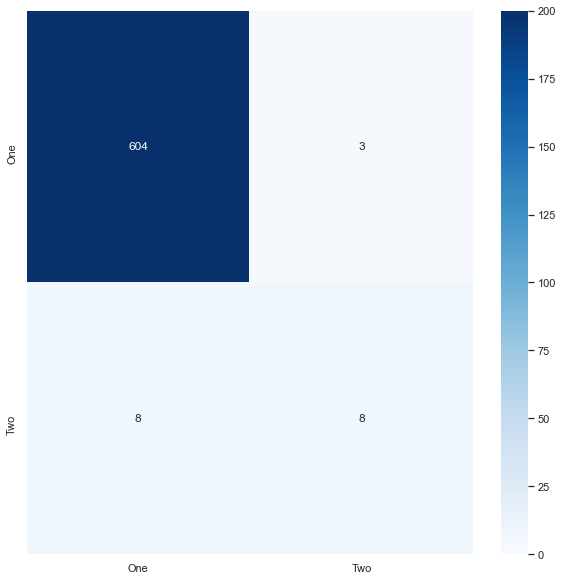

In [41]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm,columns = label_names, index = label_names)


plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns_plot = sns.heatmap(df_cm, cmap = 'Blues', annot = True, fmt='g', vmin=0, vmax=200)


## Training and Cross Validation

In [42]:
# Train test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(segement_pca, label, test_size = 0.2, random_state=121)

X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((2488, 79), (623, 79), (2488, 1), (623, 1))

In [43]:

clf = SVC(C=10000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


all_accuracies = cross_val_score(estimator=clf, X=X_train_pca, y=y_train, cv=10)

In [44]:
print(all_accuracies)

[0.96787149 0.98393574 0.99196787 0.97991968 0.98795181 0.98393574
 0.98393574 0.97590361 0.97177419 0.96774194]


# Extended

In [51]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(segement_pca, label,test_size = 0.2, random_state = 0)
#X_train_pca, X_test_pca, y_train, y_test = train_test_split(segement_pca, label, test_size = 0.2, random_state=121)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Using KMN

In [52]:
# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Accuracy Score: 0.9775280898876404
Confusion matrix 
 [[604   5]
 [  9   5]]
Classification 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       609
           1       0.50      0.36      0.42        14

    accuracy                           0.98       623
   macro avg       0.74      0.67      0.70       623
weighted avg       0.97      0.98      0.98       623



# Logistic Regression Accuracy

In [53]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9743178170144462
[[601   8]
 [  8   6]]


# LR Cohen Kappa Accuracy

In [54]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.41543513957307066

# Support Vector Machine Accuracy

In [56]:
Xtrain, Xtest, y_train, y_test = train_test_split(segement_pca, label, test_size=0.2, random_state=0)

In [57]:
#Support Vector Machine
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9807383627608347
[[606   3]
 [  9   5]]


# Gaussian Naive Bayes Accuracy

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9165329052969502
[[563  46]
 [  6   8]]


# Decision Tree Classifier Accuracy

In [62]:
Xtrain, Xtest, y_train, y_test = train_test_split(segement_pca, label, test_size=0.2, random_state=0)

In [63]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9165329052969502
[[597  12]
 [ 10   4]]


# Random Forest Classifier Accuracy

In [64]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9165329052969502
[[606   3]
 [  9   5]]
